<a href="https://colab.research.google.com/github/0mR2r0/diff-finitas/blob/google_colab/ejemplo_acoplado_automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.01       0.01473684 0.01947368 0.02421053 0.02894737 0.03368421
 0.03842105 0.04315789 0.04789474 0.05263158 0.05736842 0.06210526
 0.06684211 0.07157895 0.07631579 0.08105263 0.08578947 0.09052632
 0.09526316 0.1       ]
U1
[[0.00000000e+00 1.60522806e-09 1.12535175e-07 4.78511739e-06
  1.23409804e-04 1.93045414e-03 1.83156389e-02 1.05399225e-01
  3.67879441e-01 7.78800783e-01 1.00000000e+00 7.78800783e-01
  3.67879441e-01 1.05399225e-01 1.83156389e-02 1.93045414e-03
  1.23409804e-04 4.78511739e-06 1.12535175e-07 1.60522806e-09]
 [1.23084031e-10 6.18246393e-09 2.59597222e-07 7.98032158e-06
  1.66995041e-04 2.28570593e-03 1.99294138e-02 1.08717405e-01
  3.66568129e-01 7.57678226e-01 9.54401809e-01 7.29108203e-01
  3.36129766e-01 9.29133721e-02 1.52489544e-02 1.46161281e-03
  7.94405797e-05 2.31860333e-06 3.39554638e-08 4.62233525e-10]
 [2.92918470e-09 3.62739486e-08 6.46713282e-07 1.31908707e-05
  2.23202146e-04 2.69118278e-03 2.16547627e-02 1.12180406e-01
  3.65612320e-01 7.3795904

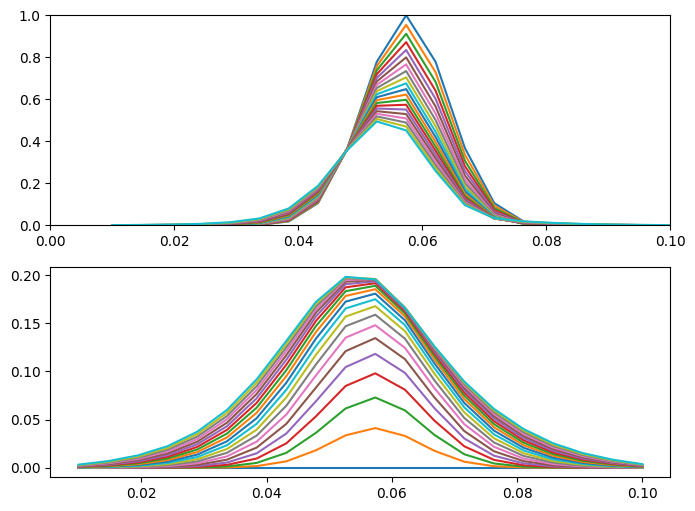

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametros
n = 40
L = 1
m = n//2
h = L/m
k = 10
a = 5
b = 100
c = 210

def system(variables, t):

    # Reshape the variables array to match the desired structure
    u = variables.reshape(n)

    # Define the matrix A
    #Matriz auxiliar 1
    A = np.zeros((n, n))

#Matriz auxiliar 1
    A=np.zeros((n,n))
    for i in range(n):
      if i == 0:
        A[i, i]     = -k
        A[i, i+1]   =  a
        A[i, i+m]   =  k
      elif i == m-1:
        A[i, i-1]   = -a
        A[i, i]     = -k
        A[i, i+m]   =  k
      elif i>0 and i<m-1:
        A[i, i-1]   = -a
        A[i, i]     = -k
        A[i, i+1]   =  a
        A[i, i+m]   =  k
      elif i == m:
        A[i, 0]     =  k
        A[i,i-1]    =  b
        A[i, i]     = -c
        A[i, i+1]   =  b
      elif i == n-1:
        A[i, i-1]   =  b
        A[i, i]     = -c
        A[i, m-1]     =  k
      elif i>m and i<n-1:
        A[i, i-1]   =  b
        A[i, i]     = -c
        A[i, i+1]   =  b
        A[i, i-m]   =  k



    # Calculate the derivatives
    dU = np.dot(A, u) #Reshape 'u' to a column vector for matrix multiplication



    # Return the derivatives as a 1-dimensional array
    return dU.flatten()

# Valores iniciales
x0 = np.zeros(m)
for i in range(1,m):  # Changed range to 0-3 for indexing from 0
    x0[i] = np.exp(-100 * (i * h - 0.5)**2)  # Use i*h for x values
y0 = np.zeros(m)  # Initialize y0 as an array of zeros
initial_conditions = np.concatenate([x0, y0])  # Concatenate x0 and y0
#print('Condiciones iniciales')
#print(initial_conditions)
# Intervalo de tiempo
t = np.linspace(0.01, 0.1, m)
print(t)
# Resolver el sistema de ecuaciones
solution = odeint(system, initial_conditions, t)

# Extract solutions for x and y (assuming they are the first 4 and last 4 elements)
u1 = solution[: , :m]
u2 = solution[: , m:]
print("U1")
print(u1)
#print("U2")
#print(u2)
#print(y[:,0])
# Graficar las soluciones
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
##############Graficas para U1######################
for i in range(m):
  axs[0].plot(t, u1[i,:], label='x1(t)')
axs[0].set_xlim(0, 0.1)
axs[0].set_ylim(0, 1)
###############Graficas para U2#####################
for i in range(m):
  axs[1].plot(t, u2[i,:], label='y1(t)')
#axs[1].plot(t, u2[0,:], label='y1(t)')

#plt.plot(t, u1[0,:], label='x1(t)')  # Example: Plotting the first x variable
#plt.plot(t, u2[0,:], label='y1(t)')  # Example: Plotting the first